# Spectroscopy Analysis of Stars of Differing Spectral Types
This program demonstrates the Python pipeline for spectroscopic image reduction and wavelength calibration. It also includes a feature analysis of absorbtion lines found in different stellar spectral types (see lab report). For this project, spectroscopic data of Deneb (A2Ia), Sadr (F8Ib), and 53 Cygni (K0III) were taken at the Leitner Observatory in New Haven on November 1st by observers Elko Gerville-Reache and Isabel Shim. The main telescope used was a 16" f/8.9 RCOS ritchey-chretien with a SBIG DSS7 spectrometer and ST402ME CCD.

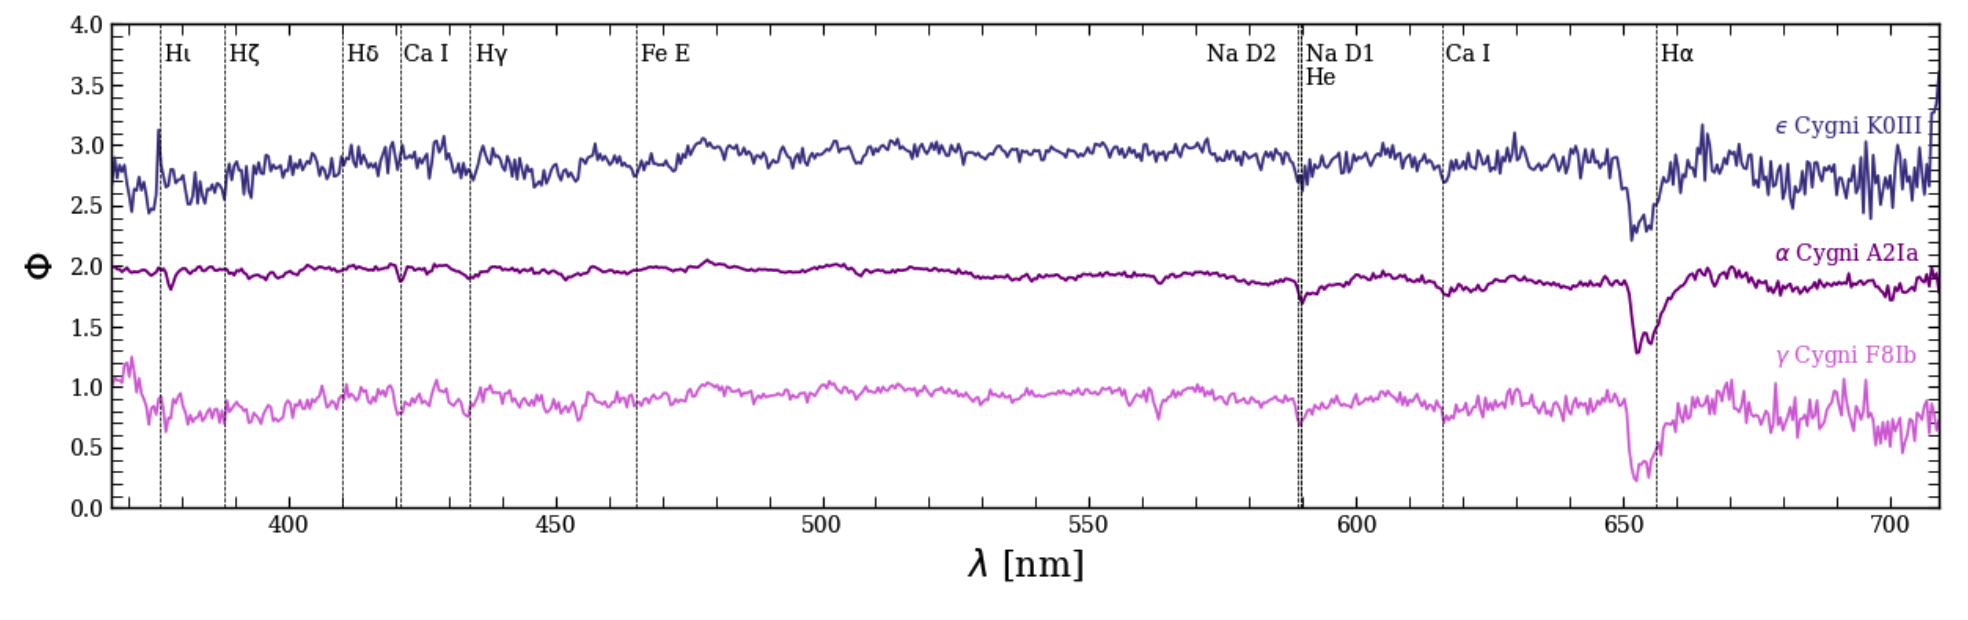

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import GISIC

In [46]:
def load_fits(img):
    """this function loads fits data and reads the data from the header"""
    hdu = fits.open(img)
    data = hdu[0].data
    return data
def imshow(image):
    """this function imshows fits data with proper astronomical settings"""
    %matplotlib inline
    fig, ax = plt.subplots(1, 2, figsize = (10,5))
    fig.tight_layout()
    ax[0].minorticks_on()
    ax[0].tick_params(axis = 'both', length = 5, direction = 'in', which = 'both', right = True, top = True)
    ax[1].minorticks_on()
    ax[1].tick_params(axis = 'both', length = 5, direction = 'in', which = 'both', right = True, top = True)

    ax[0].imshow(image, vmin = np.percentile(image, 1), vmax = np.percentile(image, 95), 
               origin = 'lower')
    ax[1].hist(image.flatten(), log = True, histtype = 'step', bins = 20, color = 'mediumslateblue', lw = 2)
def plot_spectra(spectra, label, wavelength = False, color = 'mediumslateblue', lines = False):
    %matplotlib inline
    fig, ax = plt.subplots(figsize = (6,3))
    fig.tight_layout()
    plt.rcParams['font.family'] = 'serif'
    ax.minorticks_on()
    ax.tick_params(axis = 'both', length = 5, direction = 'in', which = 'both', right = True, top = True)
    if wavelength is False:
        plt.plot(spectra, c = color, label = label)
        #plt.xlim(0, 765)
    if wavelength is not False:
        plt.plot(wavelength, spectra, lw = .6, alpha = 1, c = color, label = label)
        
        if lines is not False:
            # Htheta
            plt.vlines(379, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
            plt.text(384, 0.2, r'H${\rm\theta}$')
            # Ca
            plt.vlines(422.7, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
            plt.text(406, 0.3, 'Ca')
            # Hgamma
            plt.vlines(434, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
            plt.text(439, 0.2, r'H${\rm\gamma}$')
            # Fr. D2, sodium
            plt.vlines(589, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
            plt.text(594, 0.2, 'Na D2')
            # Halpha
            plt.vlines(656, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
            plt.text(661, 0.2, r'H${\rm\alpha}$')

        #plt.xlim(367, 709)
        #plt.ylim(0.0, 1.2)
        plt.xlabel(r'$\lambda$ [nm]', size = 14)
        plt.ylabel(r'$\phi$', size = 14)

    
    plt.legend(loc = 'upper right')
    plt.show()

In [9]:
cyg53_1 = load_fits('data/53cyg-1sec.FIT')
cyg53_2 = load_fits('data/53cyg-1sec-2.FIT')
deneb_1 = load_fits('data/deneb-1sec.FIT')
deneb_2 = load_fits('data/deneb-1sec-2.FIT')
deneb_3 = load_fits('data/deneb-1sec-3.FIT')
sadr_1 = load_fits('data/sadir-1sec.FIT')
sadr_2 = load_fits('data/sadir-1sec-2.FIT')
sadr_3 = load_fits('data/sadir-1sec-3.FIT')
mercury_1 = load_fits('data/mercury-1sec.FIT')
mercury_2 = load_fits('data/mercury-1sec-2.FIT')
mercury_3 = load_fits('data/mercury-1sec-3.FIT')
dark_1 = load_fits('data/dark-1sec.FIT')
dark_2 = load_fits('data/dark-1sec-2.FIT')
master_dark = np.median([dark_1, dark_2], axis = 0)

In [10]:
# data reduction
def dark_subtract(data, dark):
    return data - dark

In [11]:
cyg = [cyg53_1, cyg53_2]
deneb = [deneb_1, deneb_2, deneb_3]
sadr = [sadr_1, sadr_2, sadr_3]
mercury = [mercury_1, mercury_2, mercury_3]
cyg_sub = dark_subtract(cyg, master_dark)
deneb_sub = dark_subtract(deneb, master_dark)
sadr_sub = dark_subtract(sadr, master_dark)
mercury_sub = dark_subtract(mercury, master_dark)

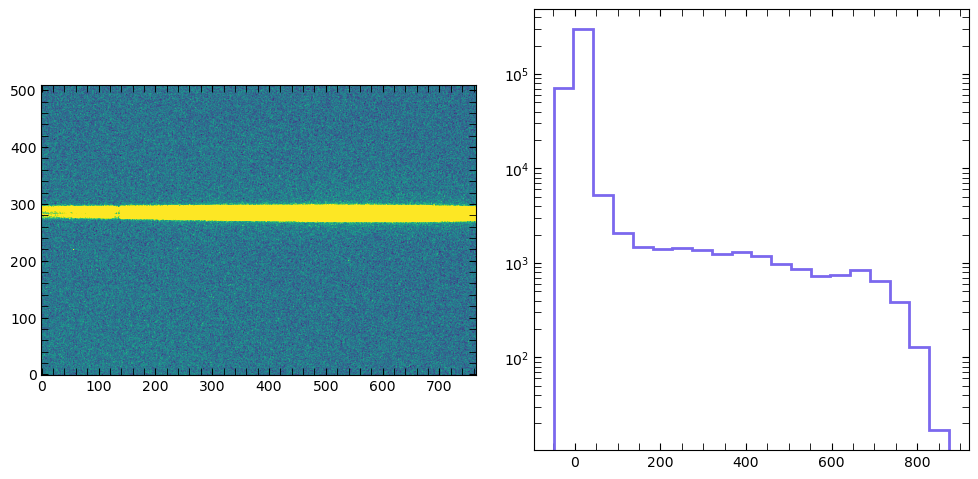

In [12]:
imshow(deneb_sub[0])

In [13]:
cyg_median = np.median(cyg_sub, axis = 0)
deneb_median = np.median(deneb_sub, axis = 0)
sadr_median = np.median(sadr_sub, axis = 0)
mercury_median = np.median(mercury_sub, axis = 0)

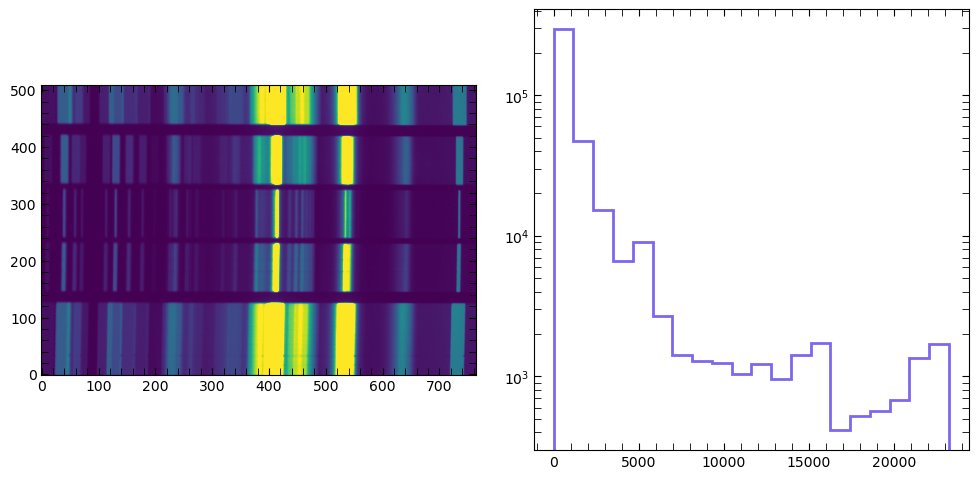

In [14]:
imshow(mercury_median)

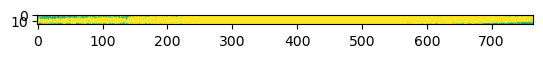

In [15]:
plt.figure()
plt.imshow(sadr_median[290:305,:], vmin = np.percentile(sadr_median, 1), vmax = np.percentile(sadr_median, 95))
plt.show()

In [16]:
# extract spectra
extracted_cyg = cyg_median[285:295, :]
extracted_deneb = deneb_median[270:300, :]
extracted_sadr = sadr_median[290:305, :]
extracted_merc = mercury_median[280:310, :]
# sum counts and flip orientation so bluer wavelengths are to the left, while redder to the right
cygsum = np.sum(extracted_cyg, axis = 0)[::-1]
denebsum = np.sum(extracted_deneb, axis = 0)[::-1]
sadrsum = np.sum(extracted_sadr, axis = 0)[::-1]
mercsum = np.sum(extracted_merc, axis = 0)[::-1]

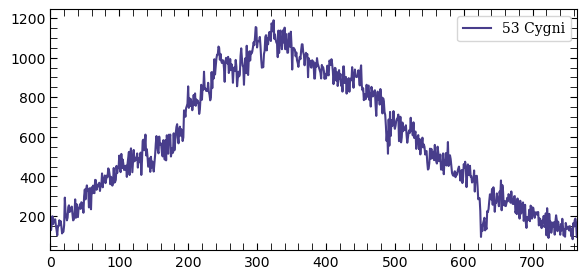

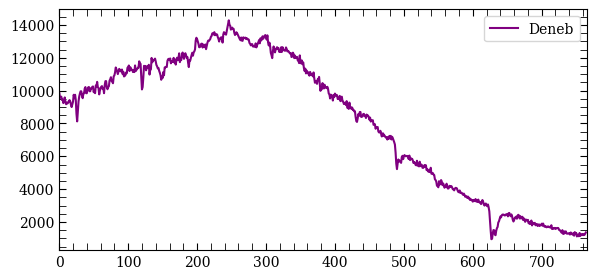

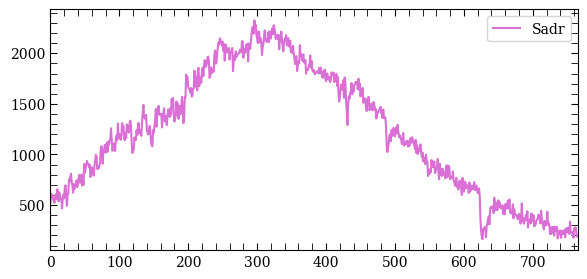

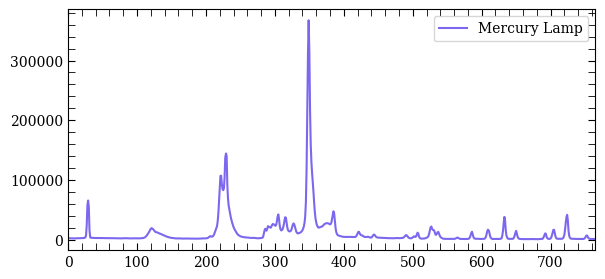

In [17]:
plot_spectra(cygsum, '53 Cygni', color = 'darkslateblue')
plot_spectra(denebsum, 'Deneb', color = 'purple')
plot_spectra(sadrsum, 'Sadr', color = 'orchid')
plot_spectra(mercsum, 'Mercury Lamp')

In [18]:
# calibrate wavelengths

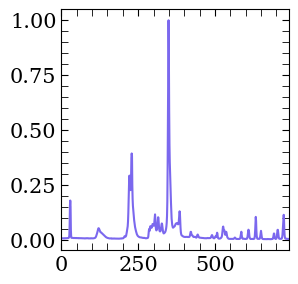

In [19]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (3, 3))
fig.tight_layout()
plt.rcParams['font.family'] = 'serif'
ax.minorticks_on()
ax.tick_params(axis = 'both', length = 5, direction = 'in', which = 'both', right = True, top = True)
plt.rcParams['axes.linewidth'] = 1
ax.tick_params(labelsize = 15)

ax.plot(mercsum/np.max(mercsum), color = 'mediumslateblue')
a = plt.xlim(0,740)

In [20]:
# compute pixel to wavelength conversion
pixel = np.array([37.0, 117, 222.6, 346.2])
mercury_lines = np.array([404.6, 407.8, 435.8, 546.5]) 
yerr = mercury_lines*.02
polyfit = np.polyfit(pixel, mercury_lines, 1)
pixl_to_wavelgth = np.poly1d(polyfit)
print('linear least sqaures fit: {}'.format(pixl_to_wavelgth))

# calibrate wavelengths
z = np.arange(0,765,1)
wavelength = pixl_to_wavelgth(z)

linear least sqaures fit:  
0.4566 x + 366.2


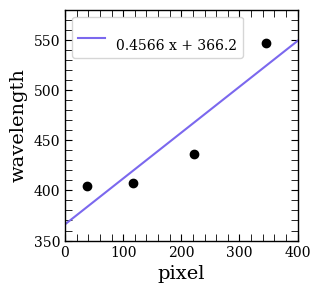

In [28]:
# plot conversion function
%matplotlib inline
plt.figure(figsize = (3,3))
plt.rcParams['font.family'] = 'serif'
plt.minorticks_on()
plt.tick_params(axis = 'both', length = 5, direction = 'in', which = 'both', right = True, top = True)
plt.rcParams['axes.linewidth'] = 1
ax.tick_params(labelsize = 15)
plt.scatter(pixel, mercury_lines, color = 'k')
#plt.errorbar(pixel, mercury_lines, yerr, color = 'k', ls = 'none', fmt = 'o', ms = 3)
a = plt.plot(z, pixl_to_wavelgth(z), color = 'mediumslateblue', label = '{}'.format(pixl_to_wavelgth))
plt.xlabel('pixel', size = 14)
plt.ylabel('wavelength', size = 14)
plt.xlim(0,400)
plt.ylim(350,580)
b = plt.legend(loc = 'upper left')

In [30]:
# normalize continuum
wave, cyg_norm, continuum = GISIC.normalize(wavelength, cygsum, sigma = 0)
wave, deneb_norm, continuum = GISIC.normalize(wavelength, denebsum, sigma = 0)
wave, sadr_norm, continuum = GISIC.normalize(wavelength, sadrsum, sigma = 0)

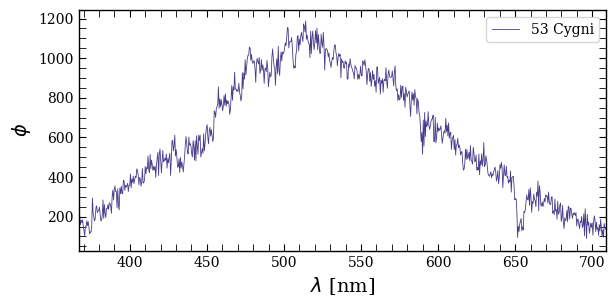

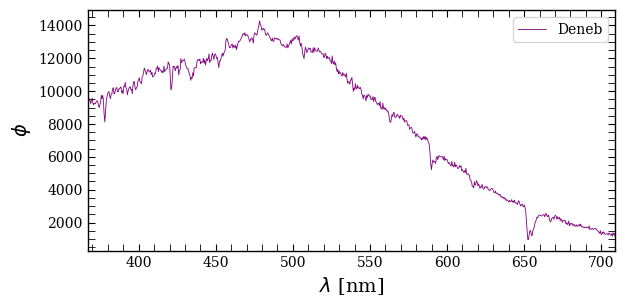

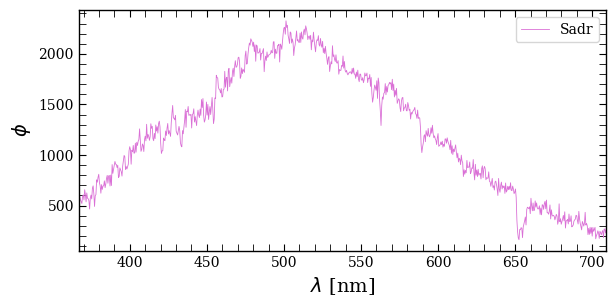

In [31]:
# plot corrected wavelengths
plot_spectra(cygsum, '53 Cygni', wavelength, 'darkslateblue')
plot_spectra(denebsum, 'Deneb', wavelength, 'purple')
plot_spectra(sadrsum, 'Sadr', wavelength, 'orchid')

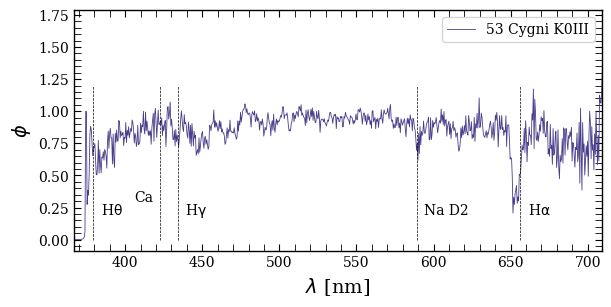

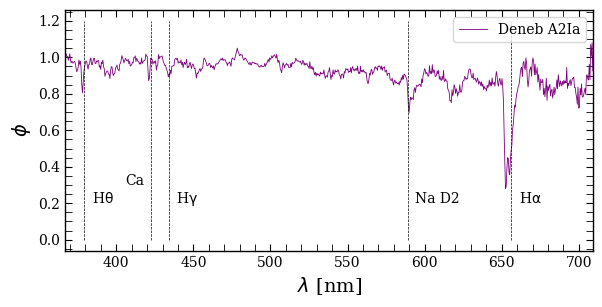

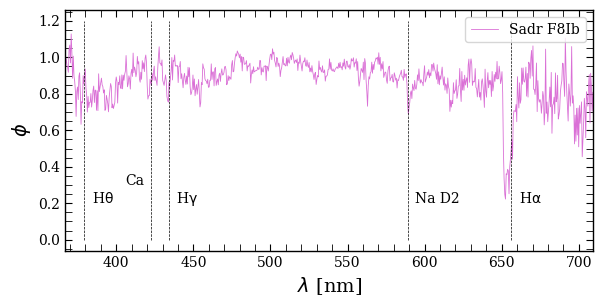

In [33]:
# plot normalized continuum
plot_spectra(cyg_norm, '53 Cygni K0III', wavelength, 'darkslateblue', True)
plot_spectra(deneb_norm, 'Deneb A2Ia', wavelength, 'purple', True)
plot_spectra(sadr_norm, 'Sadr F8Ib', wavelength, 'orchid', True)

In [32]:
# calculate velocity:
c = 3e8 # m/s
# v = c*(lambda_observed - lambda)/lambda
velocity = c*((6518 - 6563)/6563 ) # m/s
# calculate redshift:
z = velocity / c 
print('redshift of: {}'.format(z))

redshift of: -0.006856620447965869


In [34]:
counts_ave = np.convolve(cyg_norm, np.ones(5), 'valid')

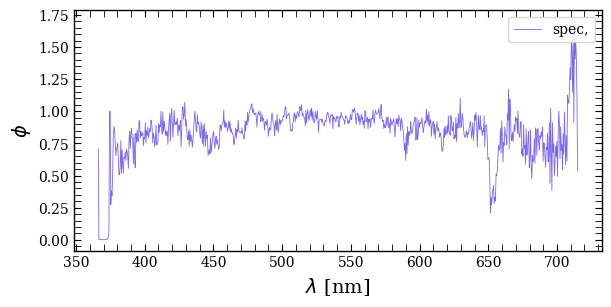

In [49]:
plot_spectra(cyg_norm, 'spec,', wavelength)

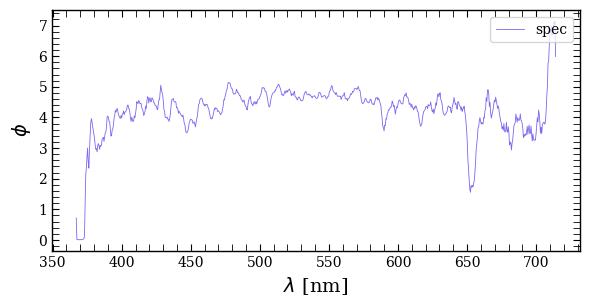

In [48]:
plot_spectra(counts_ave, 'spec',wavelength[2:-2])

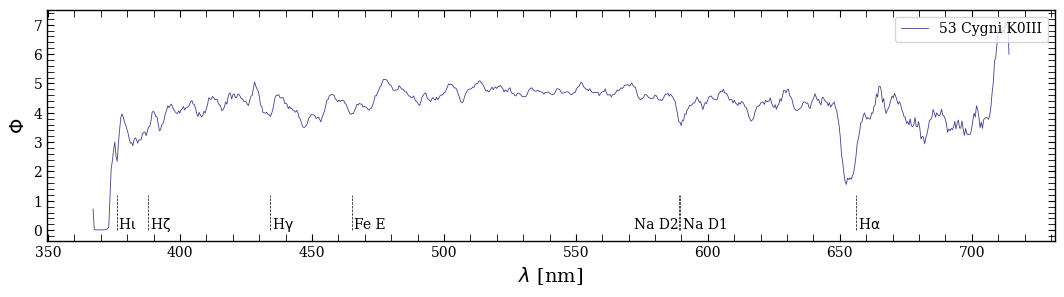

In [42]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (13,3))
#fig.tight_layout()
plt.rcParams['font.family'] = 'serif'
ax.minorticks_on()
ax.tick_params(axis = 'both', length = 5, direction = 'in', which = 'both', right = True, top = True)

plt.plot(wavelength[2:-2], counts_ave, lw = .6, alpha = 1, c = 'darkslateblue', label = '53 Cygni K0III')
# SPECTRAL LINES
# Hzeta
plt.vlines(388, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
plt.text(388.7, 0.05, r'H${\rm\zeta}$')
# Hiota
plt.vlines(376, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
plt.text(376.7, 0.05, r'H${\rm\iota}$')

# Hgamma
plt.vlines(434, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
plt.text(434.7, 0.05, r'H${\rm\gamma}$')
# Fe E
plt.vlines(465, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
plt.text(465.9, 0.05, r'Fe E')
# Na D1-D2
plt.vlines(589, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
plt.vlines(589.6, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
plt.text(572, 0.05, 'Na D2')
plt.text(590.5, 0.05, 'Na D1')
# Halpha
plt.vlines(656, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
plt.text(656.7, 0.05, r'H${\rm\alpha}$')

plt.xlim(367, 709)
#plt.ylim(0.0, 1.2)
plt.xlabel(r'$\lambda$ [nm]', size = 14)
plt.ylabel(r'$\Phi$', size = 14)

plt.legend(loc = 'upper right')
#plt.savefig('53cygspec.pdf', dpi = 500, format = 'pdf')
plt.show()


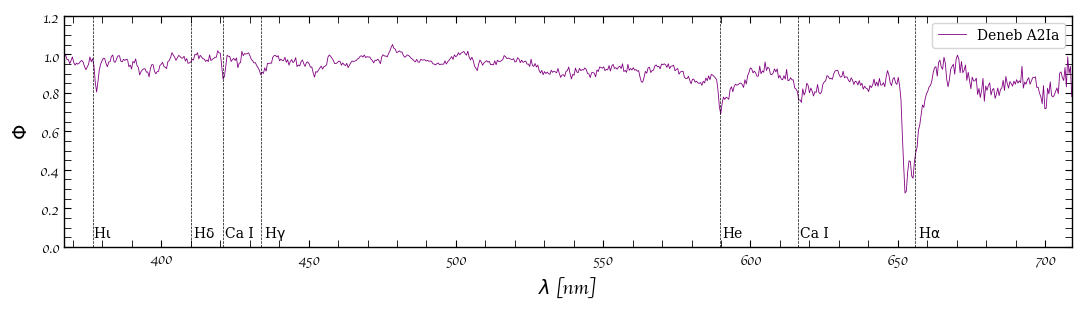

In [1234]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (13,3))
plt.rcParams['font.family'] = 'serif'
ax.minorticks_on()
ax.tick_params(axis = 'both', length = 5, direction = 'in', which = 'both', right = True, top = True)

plt.plot(wavelength, deneb_norm, lw = .6, alpha = 1, c = 'purple', label = 'Deneb A2Ia')
# SPECTRAL LINES
# Hsigma
plt.vlines(410, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
plt.text(410.7, 0.05, r'H${\rm\delta}$')
# Htheta
plt.vlines(376.7, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
plt.text(376.7, 0.05, r'H${\rm\iota}$')
# Ca
plt.vlines(421, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
plt.text(421.7, 0.05, 'Ca I')
# Hgamma
plt.vlines(434, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
plt.text(434.7, 0.05, r'H${\rm\gamma}$')
# He
plt.vlines(589.6, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
plt.text(590.3, 0.05, 'He')
#plt.vlines(571.1, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
# Ca I
plt.vlines(616, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
plt.text(616.7, 0.05, 'Ca I')
# Halpha
plt.vlines(656, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
plt.text(656.7, 0.05, r'H${\rm\alpha}$')

plt.xlim(367, 709)
plt.ylim(0.0, 1.2)
plt.xlabel(r'$\lambda$ [nm]', size = 14)
plt.ylabel(r'$\Phi$', size = 14)

plt.legend(loc = 'upper right')
plt.savefig('denebspec.png', dpi = 500)
plt.show()

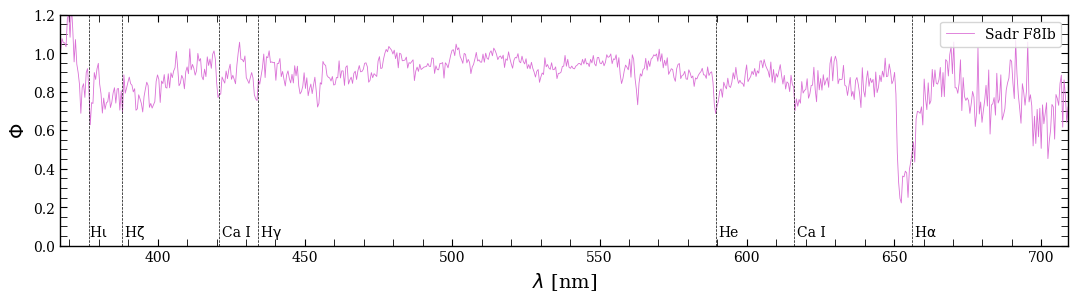

In [1235]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (13,3))
plt.rcParams['font.family'] = 'serif'
ax.minorticks_on()
ax.tick_params(axis = 'both', length = 5, direction = 'in', which = 'both', right = True, top = True)

plt.plot(wavelength, sadr_norm, lw = .6, alpha = 1, c = 'orchid', label = 'Sadr F8Ib')
# SPECTRAL LINES
# Hzeta
plt.vlines(388, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
plt.text(388.7, 0.05, r'H${\rm\zeta}$')
# Htheta
plt.vlines(376.7, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
plt.text(376.7, 0.05, r'H${\rm\iota}$')
# Ca
plt.vlines(421, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
plt.text(421.7, 0.05, 'Ca I')
# Hgamma
plt.vlines(434, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
plt.text(434.7, 0.05, r'H${\rm\gamma}$')
# He
plt.vlines(589.6, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
plt.text(590.3, 0.05, 'He')
#plt.vlines(571.1, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
# Ca I
plt.vlines(616, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
plt.text(616.9, 0.05, 'Ca I')
# Halpha
plt.vlines(656, 0.0, 1.2, ls = '--', color = 'k', lw = .5)
plt.text(656.7, 0.05, r'H${\rm\alpha}$')

plt.xlim(367, 709)
plt.ylim(0.0, 1.2)
plt.xlabel(r'$\lambda$ [nm]', size = 14)
plt.ylabel(r'$\Phi$', size = 14)

plt.legend(loc = 'upper right')
plt.savefig('sadrspec.png', dpi = 500)
plt.show()

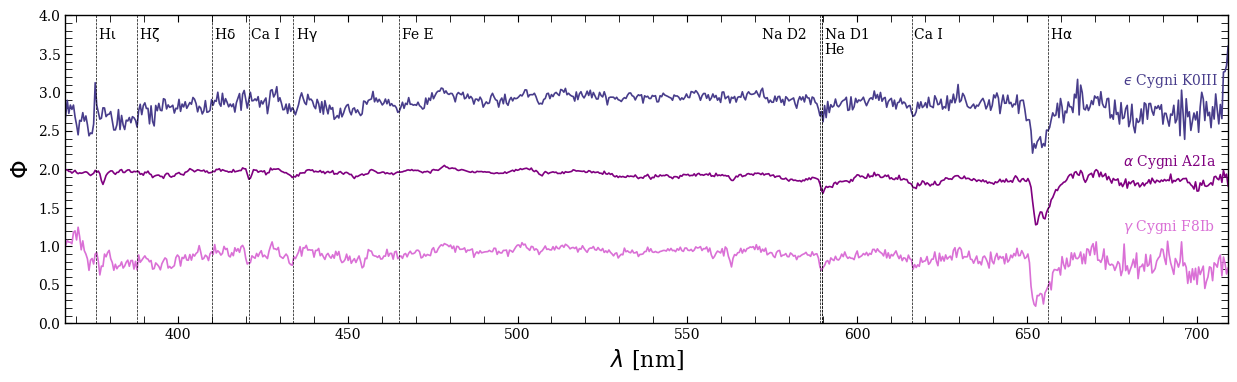

In [1279]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (15,4))
plt.rcParams['font.family'] = 'serif'
ax.minorticks_on()
ax.tick_params(axis = 'both', length = 5, direction = 'in', which = 'both', right = True, top = True)

plt.plot(wavelength, sadr_norm, lw = 1.2, alpha = 1, c = 'orchid', label = 'Sadr F8Ib')
plt.plot(wavelength, deneb_norm+1, lw = 1.2, alpha = 1, c = 'purple', label = 'Deneb A2Ia')
plt.plot(wavelength, cyg_norm+2, lw = 1.2, alpha = 1, c = 'darkslateblue', label = '53 Cygni K0III')

# Hzeta
plt.vlines(388, 0.0, 4, ls = '--', color = 'k', lw = .5)
plt.text(388.7, 3.7, r'H${\rm\zeta}$')
# Hiota
plt.vlines(376, 0.0, 4, ls = '--', color = 'k', lw = .5)
plt.text(376.7, 3.7, r'H${\rm\iota}$')
# Hsigma
plt.vlines(410, 0.0, 4, ls = '--', color = 'k', lw = .5)
plt.text(410.7, 3.7, r'H${\rm\delta}$')
# Ca I
plt.vlines(421, 0.0, 4, ls = '--', color = 'k', lw = .5)
plt.text(421.7, 3.7, 'Ca I')
# Hgamma
plt.vlines(434, 0.0, 4, ls = '--', color = 'k', lw = .5)
plt.text(434.7, 3.7, r'H${\rm\gamma}$')
# Fe E
plt.vlines(465, 0.0, 4, ls = '--', color = 'k', lw = .5)
plt.text(465.9, 3.7, r'Fe E')
# He
plt.vlines(589.6, 0.0, 4, ls = '--', color = 'k', lw = .5)
plt.text(590.3, 3.5, 'He')
# Na D1-D2
plt.vlines(589, 0.0, 4, ls = '--', color = 'k', lw = .5)
plt.vlines(589.6, 0.0, 4, ls = '--', color = 'k', lw = .5)
plt.text(572, 3.7, 'Na D2')
plt.text(590.5, 3.7, 'Na D1')
# Ca I
plt.vlines(616, 0.0, 4, ls = '--', color = 'k', lw = .5)
plt.text(616.7, 3.7, 'Ca I')
# Halpha
plt.vlines(656, 0.0, 4, ls = '--', color = 'k', lw = .5)
plt.text(656.7, 3.7, r'H${\rm\alpha}$')

plt.text(678, 3.1, u'$\u03F5$ Cygni K0III', color = 'darkslateblue')
plt.text(678, 2.05, r'$\alpha$ Cygni A2Ia', color = 'purple')
plt.text(678, 1.2, r'$\gamma$ Cygni F8Ib', color = 'orchid')

plt.xlim(367, 709)
plt.ylim(0.0, 4)
a = plt.xlabel(r'$\lambda$ [nm]', size = 16)
b = plt.ylabel(r'$\Phi$', size = 17)
plt.savefig('cyg_deneb_sadr.png', dpi = 1000, format = 'png')
plt.show()
#plt.legend(loc = 'upper right')

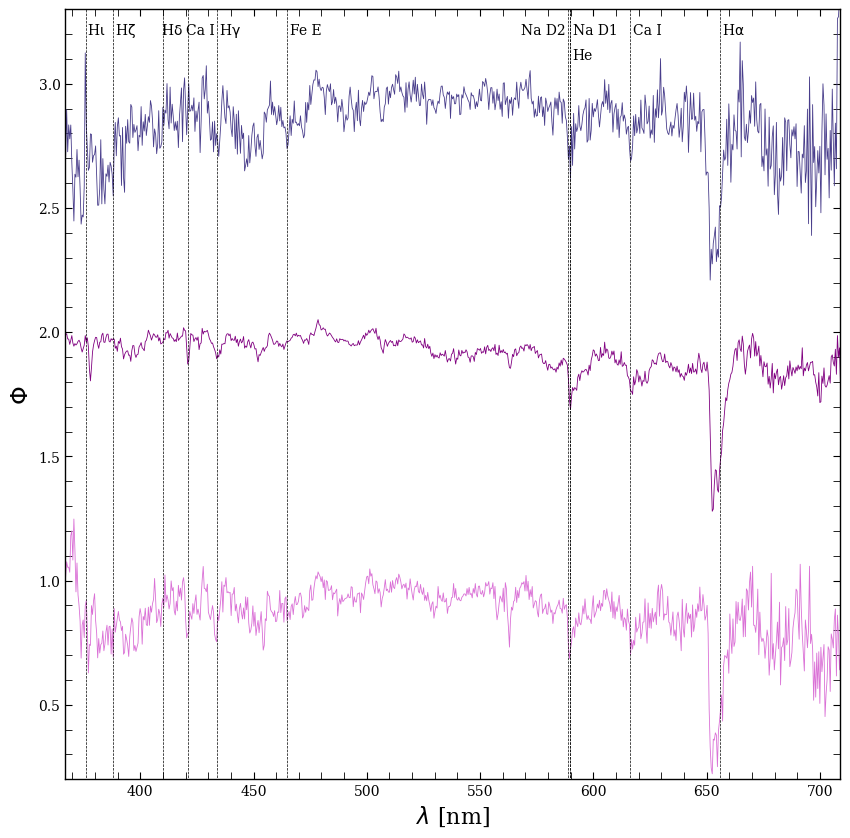

In [1225]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (10,10))
plt.rcParams['font.family'] = 'serif'
ax.minorticks_on()
ax.tick_params(axis = 'both', length = 5, direction = 'in', which = 'both', right = True, top = True)

plt.plot(wavelength, sadr_norm, lw = .6, alpha = 1, c = 'orchid', label = 'Sadr F8Ib')
plt.plot(wavelength, deneb_norm+1, lw = .6, alpha = 1, c = 'purple', label = 'Deneb A2Ia')
plt.plot(wavelength, cyg_norm+2, lw = .6, alpha = 1, c = 'darkslateblue', label = '53 Cygni K0III')

# Hzeta
plt.vlines(388, 0.0, 4, ls = '--', color = 'k', lw = .5)
plt.text(388.7, 3.2, r'H${\rm\zeta}$')
# Hiota
plt.vlines(376, 0.0, 4, ls = '--', color = 'k', lw = .5)
plt.text(376.7, 3.2, r'H${\rm\iota}$')
# Hsigma
plt.vlines(410, 0.0, 4, ls = '--', color = 'k', lw = .5)
plt.text(409.0, 3.2, r'H${\rm\delta}$')
# Ca I
plt.vlines(421, 0.0, 4, ls = '--', color = 'k', lw = .5)
plt.text(420.0, 3.2, 'Ca I')
# Hgamma
plt.vlines(434, 0.0, 4, ls = '--', color = 'k', lw = .5)
plt.text(434.7, 3.2, r'H${\rm\gamma}$')
# Fe E
plt.vlines(465, 0.0, 4, ls = '--', color = 'k', lw = .5)
plt.text(465.9, 3.2, r'Fe E')
# He
plt.vlines(589.6, 0.0, 4, ls = '--', color = 'k', lw = .5)
plt.text(590.8, 3.1, 'He')
# Na D1-D2
plt.vlines(589, 0.0, 4, ls = '--', color = 'k', lw = .5)
plt.vlines(589.6, 0.0, 4, ls = '--', color = 'k', lw = .5)
plt.text(568, 3.2, 'Na D2')
plt.text(590.8, 3.2, 'Na D1')
# Ca I
plt.vlines(616, 0.0, 4, ls = '--', color = 'k', lw = .5)
plt.text(617.5, 3.2, 'Ca I')
# Halpha
plt.vlines(656, 0.0, 4, ls = '--', color = 'k', lw = .5)
plt.text(656.7, 3.2, r'H${\rm\alpha}$')

plt.xlim(367, 709)
plt.ylim(0.2, 3.3)
a = plt.xlabel(r'$\lambda$ [nm]', size = 16)
b = plt.ylabel(r'$\Phi$', size = 17)
plt.savefig('cyg_deneb_sadr10_10.pdf', dpi = 1000, format = 'pdf')
plt.show()
#plt.legend(loc = 'upper right')